In [112]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#plotting settings
sns.set()
%matplotlib inline

# Display
pd.set_option('display.max_rows', 999999)
pd.set_option('display.max_columns', 999999)
pd.set_option('display.width', 999999)

In [113]:
ds = pd.read_csv('./csse_covid_19_data/csse_covid_19_daily_reports/03-21-2020.csv')
ds.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880


In [114]:
ds.shape

(304, 8)

# Coronavirus impact global analysis

In [115]:
#making the country the index of the dataframe
covid_global = ds.pivot_table(index=['Country/Region'], 
                              values = ['Confirmed', 'Deaths', 'Recovered'],
                              aggfunc='sum')
covid_global.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,24,0,1
Albania,76,2,2
Algeria,139,15,32
Andorra,88,0,1
Angola,2,0,0


In [116]:
# Analising letality rate in these countries
covid_global['Letality rate (%)'] = round(((covid_global['Deaths']/covid_global['Confirmed'])*100),2)

In [117]:
covid_global.head()

,Confirmed,Deaths,Recovered,Letality rate (%)
Country/Region,,,,
Afghanistan,24,0,1,0.00
Albania,76,2,2,2.63
Algeria,139,15,32,10.79
Andorra,88,0,1,0.00
Angola,2,0,0,0.00


In [118]:
covid_global_top = covid_global.sort_values(by ='Confirmed').nlargest(18, 'Confirmed')
covid_global_top

,Confirmed,Deaths,Recovered,Letality rate (%)
Country/Region,,,,
China,81305,3259,71857,4.01
Italy,53578,4825,6072,9.01
US,25493,307,171,1.20
Spain,25374,1375,2125,5.42
Germany,22213,84,233,0.38
Iran,20610,1556,7635,7.55
France,14308,562,12,3.93
"Korea, South",8799,102,1540,1.16
Switzerland,6575,75,15,1.14


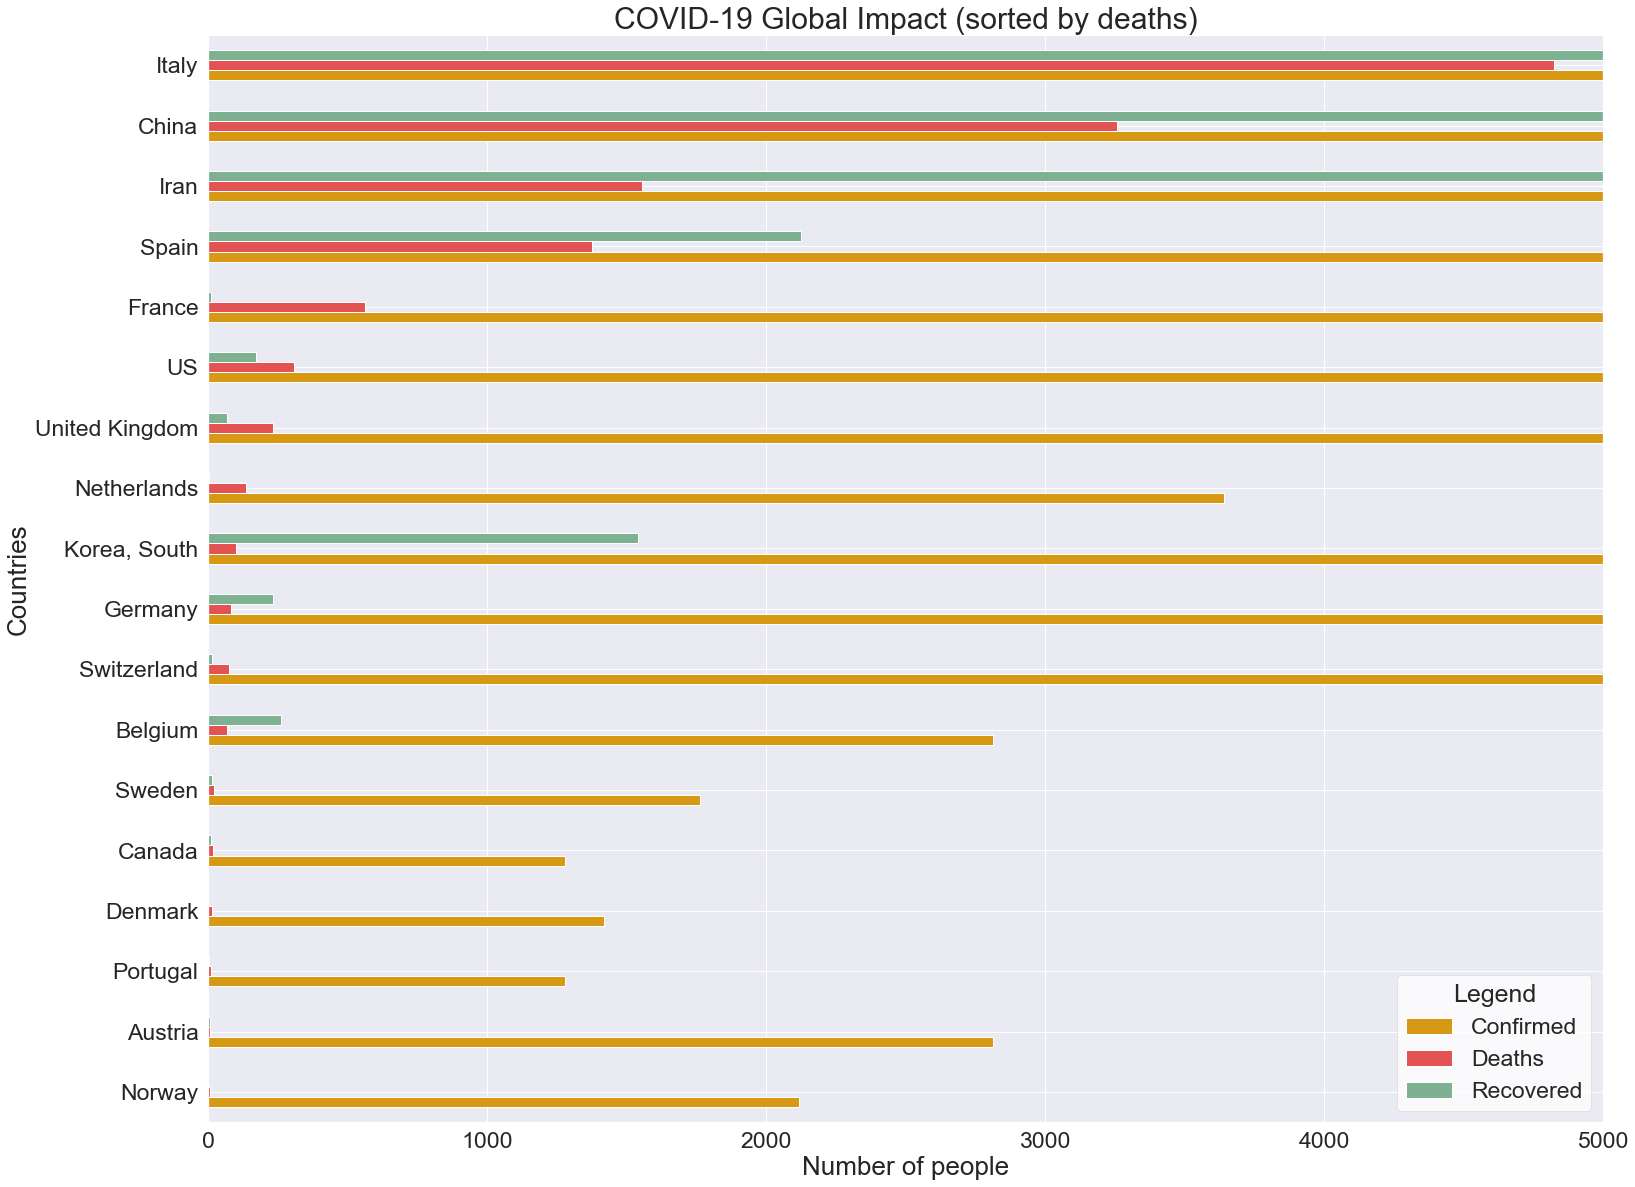

In [119]:
covid_global_top[['Confirmed', 'Deaths', 'Recovered']].sort_values(by=['Deaths'], ascending=True).plot.barh(
    figsize = (25, 20), 
    width=0.5, 
    align='center', 
    color = ['#D79913', 
             '#E35353', 
             '#7DB192',
             '#1B5EF7'])

plt.xlabel('Number of people', fontsize=26)
plt.ylabel('Countries', fontsize=26)
plt.title('COVID-19 Global Impact (sorted by deaths)', fontsize=30)


plt.xlim(0, 5000) # x axis is cut due to high numbers in confirmed cases so deaths are visible
plt.style.use('ggplot')

plt.xticks(fontsize=23, rotation=0)
plt.yticks(fontsize=23)
plt.legend(fontsize=23, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('covid_global_impact.jpg', dpi=540)
plt.show()

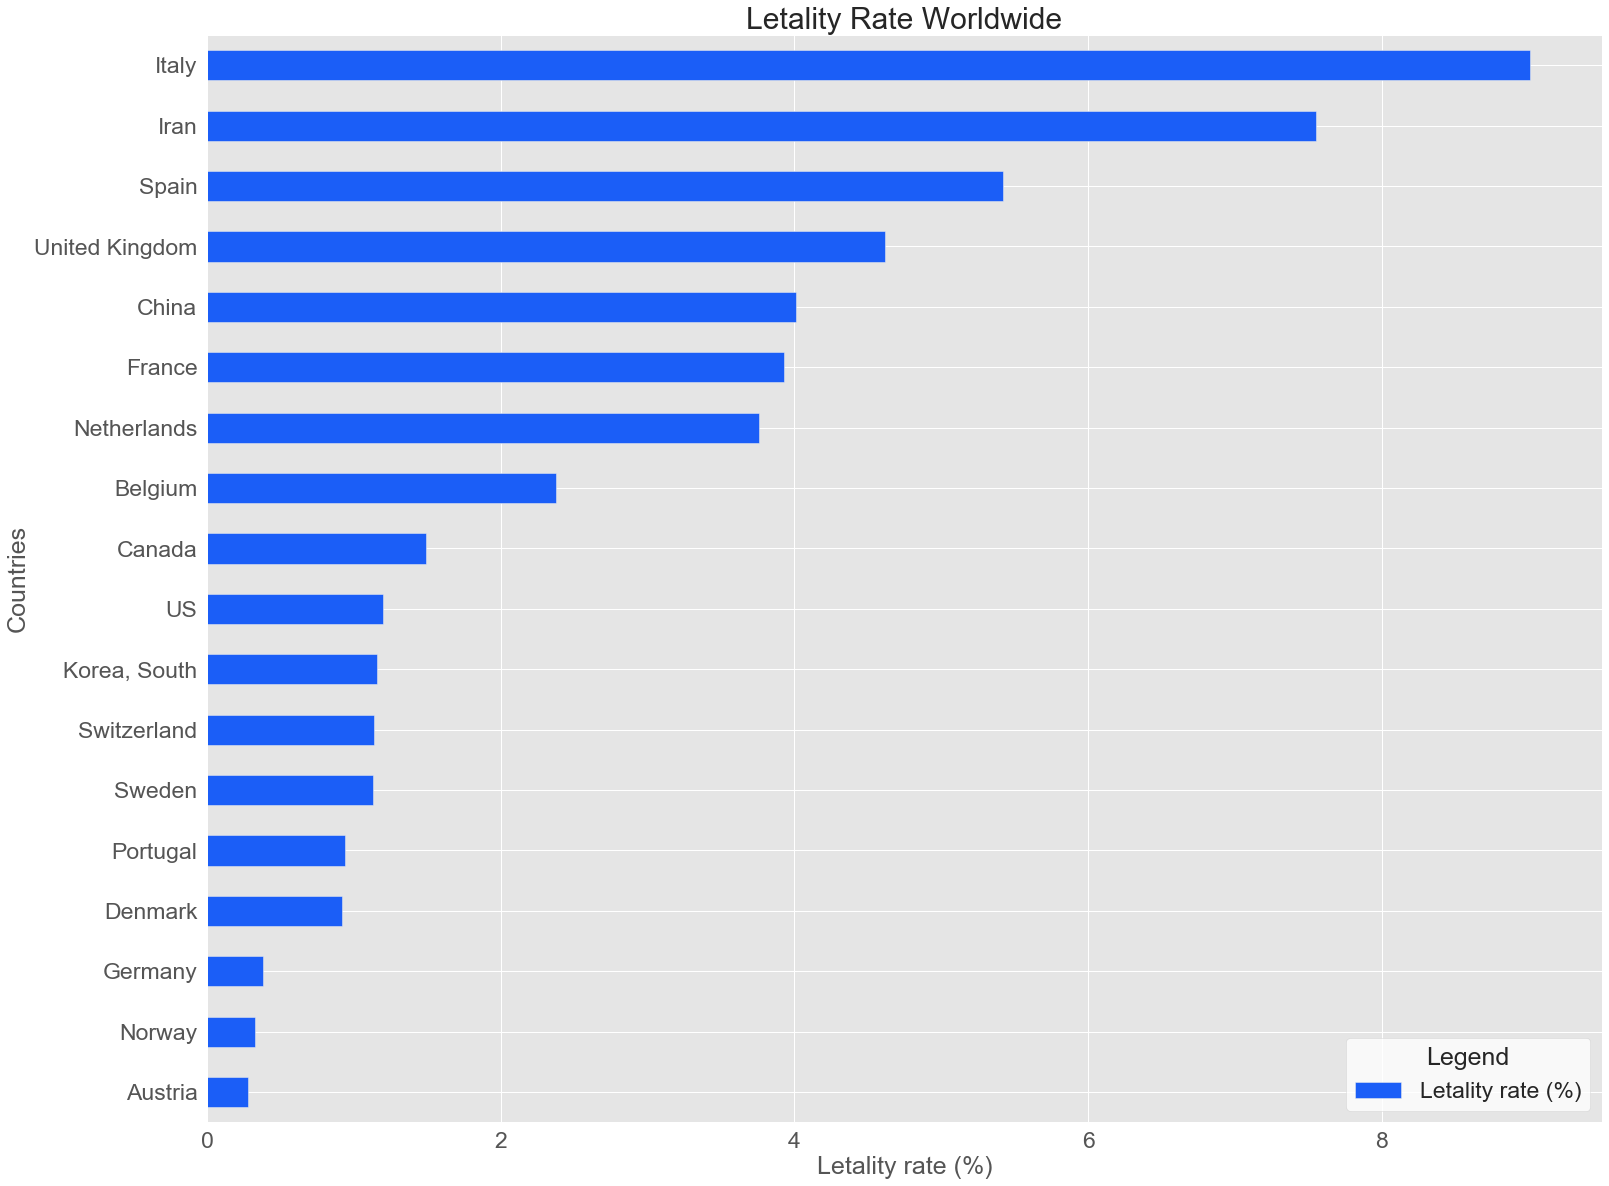

In [134]:
covid_global_top[['Letality rate (%)']].sort_values(by=['Letality rate (%)'], ascending=True).plot.barh(
    figsize = (25, 20), 
    width=0.5, 
    align='center', 
    color = ['#1B5EF7'])

plt.xlabel('Letality rate (%)', fontsize=25)
plt.ylabel('Countries', fontsize=25)
plt.title('Letality Rate Worldwide', fontsize=30)


plt.xlim(0, 9.5) # x axis is cut due to high numbers in confirmed cases so deaths are visible
plt.style.use('ggplot')

plt.xticks(fontsize=23, rotation=0)
plt.yticks(fontsize=23)
plt.legend(fontsize=23, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('covid_letality_rate.jpg', dpi=540)
plt.show()

# Coronavirus impact in China analysis 

In [126]:
ds_china = ds.pivot_table(index=['Province/State'], 
                          values = ['Country/Region','Confirmed', 'Deaths', 'Recovered'],
                          aggfunc='max')

ds_china = ds_china[ds_china['Country/Region'] == 'China'].nlargest(20, 'Deaths')

In [127]:
#adding letality rate column and calculation
ds_china['Letality rate (%)'] = round(((ds_china['Deaths']/ds_china['Confirmed'])*100),2)

In [128]:
#defining correct order of columns in dataframe
ds_china = ds_china[['Country/Region','Confirmed', 'Deaths', 'Recovered','Letality rate (%)']]
ds_china

,Country/Region,Confirmed,Deaths,Recovered,Letality rate (%)
Province/State,,,,,
Hubei,China,67800,3139,58946,4.63
Henan,China,1273,22,1250,1.73
Heilongjiang,China,484,13,463,2.69
Beijing,China,504,8,396,1.59
Guangdong,China,1400,8,1325,0.57
Shandong,China,764,7,749,0.92
Anhui,China,990,6,984,0.61
Chongqing,China,576,6,570,1.04
Hainan,China,168,6,161,3.57


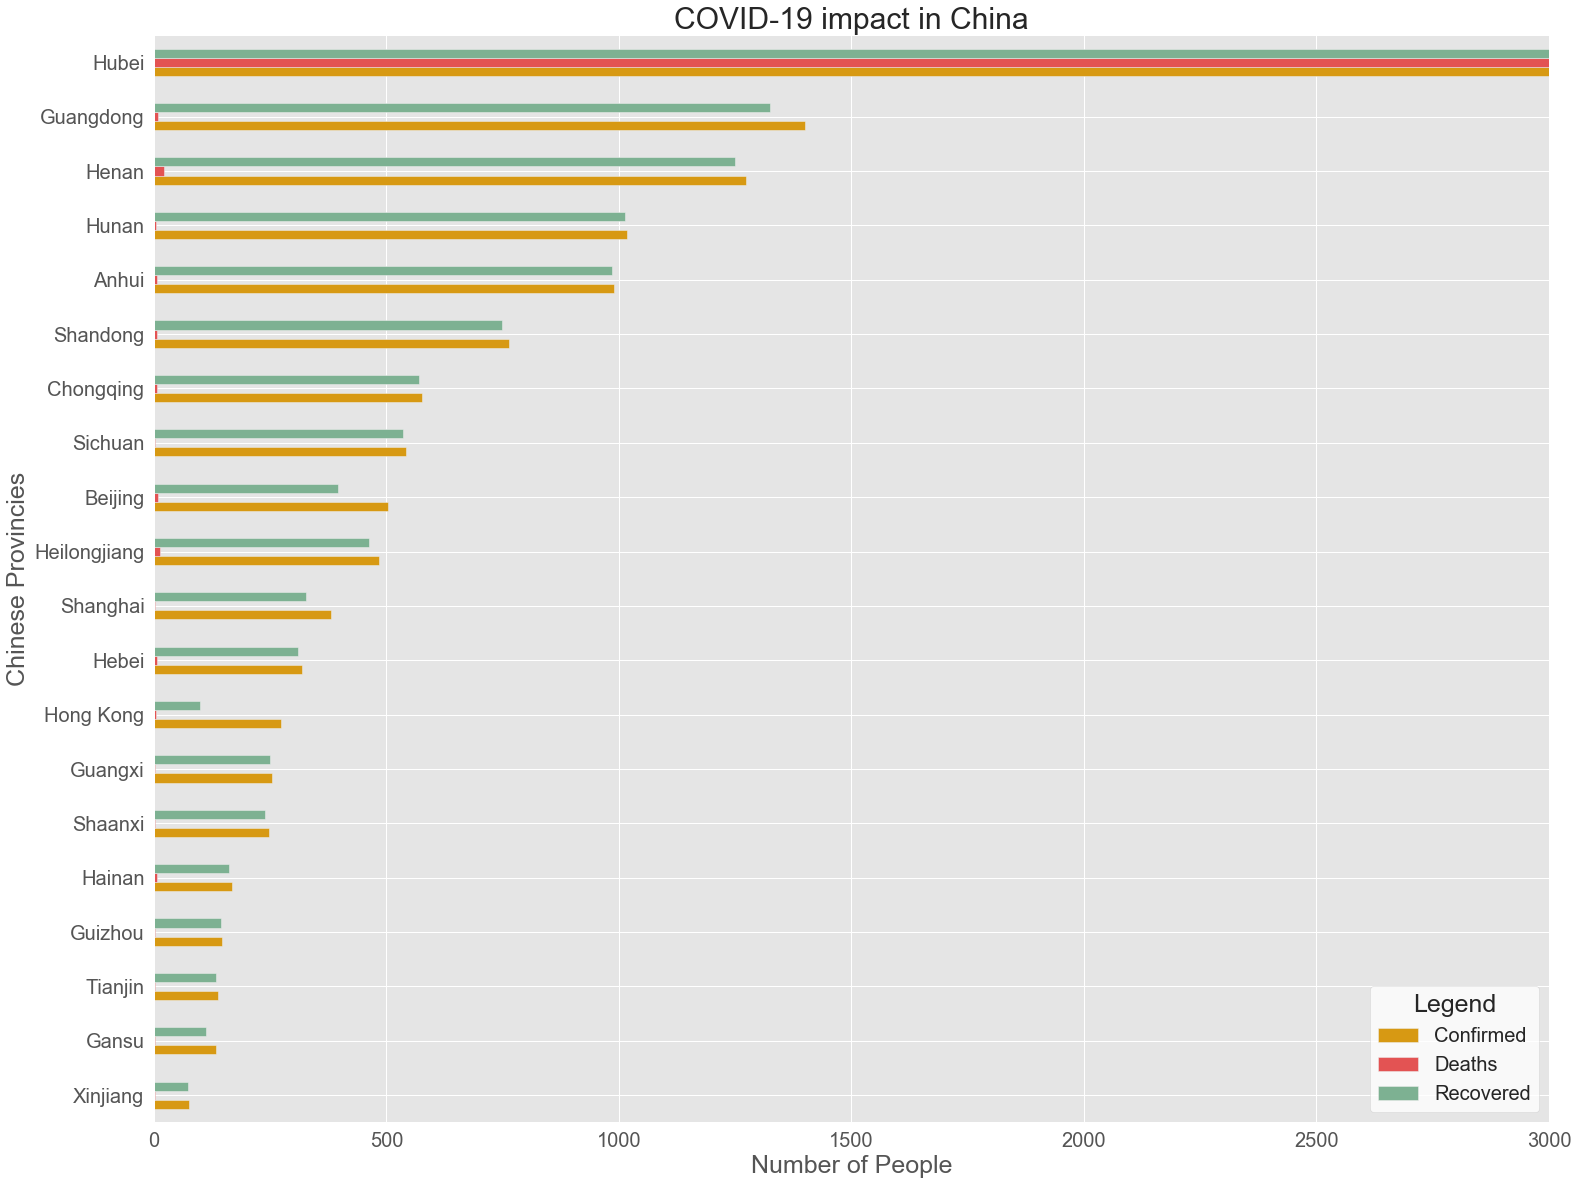

In [130]:
ds_china[['Confirmed','Deaths','Recovered']].sort_values(by=['Confirmed'], ascending=True).plot.barh(figsize = (25, 20), 
                                                                 width=0.5, 
                                                                 align='center', 
                                                                 color = ['#D79913', 
                                                                          '#E35353', 
                                                                          '#7DB192'])

plt.ylabel('Chinese Provincies', fontsize=25)
plt.xlabel('Number of People', fontsize=25)
plt.title('COVID-19 impact in China', fontsize=30)

plt.xlim(0, 3000)
plt.style.use('ggplot')

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('covid_in_China_.jpg', dpi=540)
plt.show()

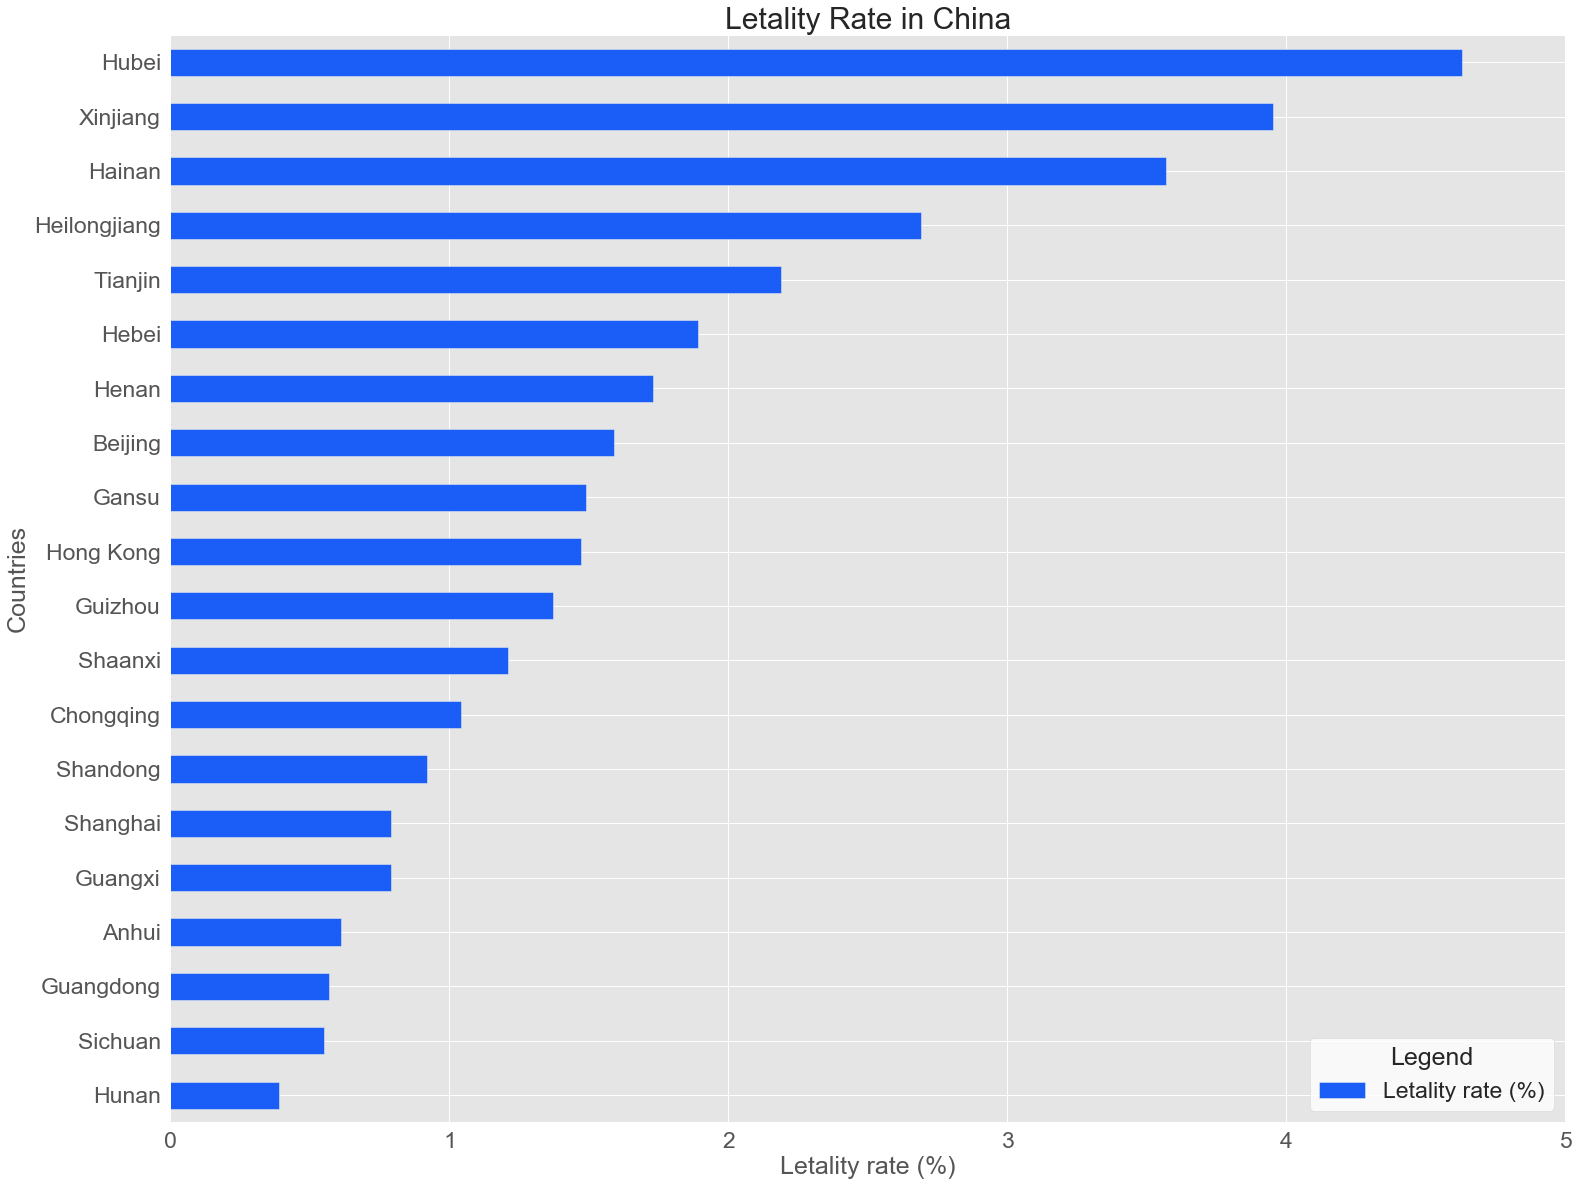

In [133]:
ds_china[['Letality rate (%)']].sort_values(by=['Letality rate (%)'], ascending=True).plot.barh(
    figsize = (25, 20), 
    width=0.5, 
    align='center', 
    color = ['#1B5EF7'])

plt.xlabel('Letality rate (%)', fontsize=25)
plt.ylabel('Countries', fontsize=25)
plt.title('Letality Rate in China', fontsize=30)


plt.xlim(0, 5) # x axis is cut due to high numbers in confirmed cases so deaths are visible
plt.style.use('ggplot')

plt.xticks(fontsize=23, rotation=0)
plt.yticks(fontsize=23)
plt.legend(fontsize=23, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('covid_letality_rate_China.jpg', dpi=540)
plt.show()

# Time series analysis

In [135]:
confirmed = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [136]:
deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [137]:
recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [138]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29,29,29,33,35
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,4


In [139]:
#looking at the number of rows and columns
deaths.shape

(482, 64)

In [140]:
deaths = deaths.groupby(['Country/Region']).sum()

In [141]:
deaths.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
#removing latitude and longitude columns
deaths.drop(columns = ['Lat', 'Long'], axis=1, inplace=True)

In [143]:
#sorting dataframe of top countries affected in descending order
deaths = deaths.sort_values(by=deaths.columns[-1], ascending = False)
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,7,10,12,17,21,29,34,52,79,107,148,197,233,366,463,631,827,827,1266,1441,1809,2158,2503,2978,3405,4032,4825
China,17,18,26,42,56,82,131,133,171,213,259,361,425,491,563,633,718,805,905,1012,1112,1117,1369,1521,1663,1766,1864,2003,2116,2238,2238,2443,2445,2595,2665,2717,2746,2790,2837,2872,2914,2947,2983,3015,3044,3072,3100,3123,3139,3161,3172,3180,3193,3203,3217,3230,3241,3249,3253,3259
Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,5,8,12,16,19,26,34,43,54,66,77,92,107,124,145,194,237,291,354,429,514,611,724,853,988,1135,1284,1433,1556
Spain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,5,10,17,28,35,54,55,133,195,289,342,533,623,830,1043,1375
France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,4,4,6,9,11,19,19,33,48,48,79,91,91,148,148,148,243,450,562


In [144]:
#making date as index of dataframe to be used later on graphs
deaths_t = deaths.transpose()

In [145]:
deaths_t.head()

Country/Region,Italy,China,Iran,Spain,France,US,United Kingdom,Netherlands,"Korea, South",Germany,Switzerland,Belgium,Indonesia,Japan,San Marino,Sweden,Philippines,Canada,Iraq,Brazil,Algeria,Greece,Denmark,Portugal,Egypt,Turkey,Luxembourg,Austria,Cruise Ship,Norway,Ecuador,Australia,Poland,Peru,Lebanon,Hungary,India,Argentina,Malaysia,Morocco,Ireland,Pakistan,Ukraine,Bulgaria,United Arab Emirates,Bangladesh,Albania,Burkina Faso,Taiwan*,Singapore,Costa Rica,Mexico,Dominican Republic,Bosnia and Herzegovina,Cuba,Iceland,Tunisia,Russia,Israel,Paraguay,Guyana,Mauritius,Guatemala,Serbia,Ghana,Thailand,Jamaica,Martinique,Gabon,Finland,Panama,Lithuania,Moldova,Slovakia,Slovenia,Congo (Kinshasa),Azerbaijan,Sudan,Croatia,Bahrain,Oman,Nigeria,Papua New Guinea,Nicaragua,Niger,North Macedonia,Afghanistan,Qatar,Romania,Zambia,Vietnam,Venezuela,Uzbekistan,Uruguay,Uganda,Trinidad and Tobago,Togo,Tanzania,Suriname,Sri Lanka,South Africa,Somalia,Seychelles,Senegal,Saudi Arabia,Saint Vincent and the Grenadines,Saint Lucia,Rwanda,New Zealand,Kazakhstan,Nepal,Namibia,East Timor,Djibouti,Czechia,Cyprus,Cote d'Ivoire,Congo (Brazzaville),Colombia,Chile,Chad,Central African Republic,Cape Verde,Cameroon,Cambodia,Cabo Verde,Brunei,Bolivia,Bhutan,Benin,Belarus,Barbados,"Bahamas, The",Armenia,Antigua and Barbuda,Angola,Andorra,El Salvador,Equatorial Guinea,Eritrea,Kuwait,Montenegro,Mongolia,Monaco,Mauritania,Malta,Maldives,Madagascar,Liechtenstein,Liberia,Latvia,Kyrgyzstan,Kosovo,Estonia,Kenya,Jordan,Honduras,Holy See,Haiti,Guinea,Georgia,"Gambia, The",Fiji,Ethiopia,Eswatini,Zimbabwe
1/22/20,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [146]:
# changing date format for better graphic visualisation of date
from datetime import datetime

In [147]:
deaths_t.index[1]

'1/23/20'

In [148]:
#converting index str type to dateime
deaths_t.index = pd.to_datetime(deaths_t.index).strftime('%d-%b-%Y')

In [149]:
deaths_t.tail(10)

Country/Region,Italy,China,Iran,Spain,France,US,United Kingdom,Netherlands,"Korea, South",Germany,Switzerland,Belgium,Indonesia,Japan,San Marino,Sweden,Philippines,Canada,Iraq,Brazil,Algeria,Greece,Denmark,Portugal,Egypt,Turkey,Luxembourg,Austria,Cruise Ship,Norway,Ecuador,Australia,Poland,Peru,Lebanon,Hungary,India,Argentina,Malaysia,Morocco,Ireland,Pakistan,Ukraine,Bulgaria,United Arab Emirates,Bangladesh,Albania,Burkina Faso,Taiwan*,Singapore,Costa Rica,Mexico,Dominican Republic,Bosnia and Herzegovina,Cuba,Iceland,Tunisia,Russia,Israel,Paraguay,Guyana,Mauritius,Guatemala,Serbia,Ghana,Thailand,Jamaica,Martinique,Gabon,Finland,Panama,Lithuania,Moldova,Slovakia,Slovenia,Congo (Kinshasa),Azerbaijan,Sudan,Croatia,Bahrain,Oman,Nigeria,Papua New Guinea,Nicaragua,Niger,North Macedonia,Afghanistan,Qatar,Romania,Zambia,Vietnam,Venezuela,Uzbekistan,Uruguay,Uganda,Trinidad and Tobago,Togo,Tanzania,Suriname,Sri Lanka,South Africa,Somalia,Seychelles,Senegal,Saudi Arabia,Saint Vincent and the Grenadines,Saint Lucia,Rwanda,New Zealand,Kazakhstan,Nepal,Namibia,East Timor,Djibouti,Czechia,Cyprus,Cote d'Ivoire,Congo (Brazzaville),Colombia,Chile,Chad,Central African Republic,Cape Verde,Cameroon,Cambodia,Cabo Verde,Brunei,Bolivia,Bhutan,Benin,Belarus,Barbados,"Bahamas, The",Armenia,Antigua and Barbuda,Angola,Andorra,El Salvador,Equatorial Guinea,Eritrea,Kuwait,Montenegro,Mongolia,Monaco,Mauritania,Malta,Maldives,Madagascar,Liechtenstein,Liberia,Latvia,Kyrgyzstan,Kosovo,Estonia,Kenya,Jordan,Honduras,Holy See,Haiti,Guinea,Georgia,"Gambia, The",Fiji,Ethiopia,Eswatini,Zimbabwe
12-Mar-2020,827,3172,429,55,48,40,8,5,66,3,4,3,1,16,3,1,2,1,8,0,1,1,0,0,1,0,0,1,7,0,0,3,1,0,3,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13-Mar-2020,1266,3180,514,133,79,47,8,10,66,7,11,3,4,19,5,1,5,1,9,0,2,1,0,0,2,0,0,1,7,0,0,3,2,0,3,0,2,2,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14-Mar-2020,1441,3193,611,195,91,54,21,12,72,9,13,4,5,22,5,2,8,1,10,0,3,3,1,0,2,0,1,1,7,3,2,3,3,0,3,0,2,2,0,1,2,0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15-Mar-2020,1809,3203,724,289,91,63,21,20,75,11,14,4,5,22,5,3,11,1,10,0,4,4,2,0,2,0,1,1,7,3,2,3,3,0,3,1,2,2,0,1,2,0,1,2,0,0,1,0,1,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16-Mar-2020,2158,3217,853,342,148,85,56,24,75,17,14,5,5,27,7,6,12,4,10,0,4,4,3,0,2,0,1,3,7,3,2,3,4,0,3,1,2,2,0,1,2,0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17-Mar-2020,2503,3230,988,533,148,108,56,43,81,24,27,10,5,29,7,7,12,5,11,1,4,5,4,1,4,1,1,3,7,3,2,5,5,0,3,1,3,2,2,2,2,0,2,2,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18-Mar-2020,2978,3241,1135,623,148,118,72,58,84,28,28,14,19,29,11,10,19,8,12,3,7,5,4,2,6,1,2,4,7,6,2,6,5,0,3,1,3,2,2,2,2,0,2,2,0,1,2,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Plotting deaths evolution

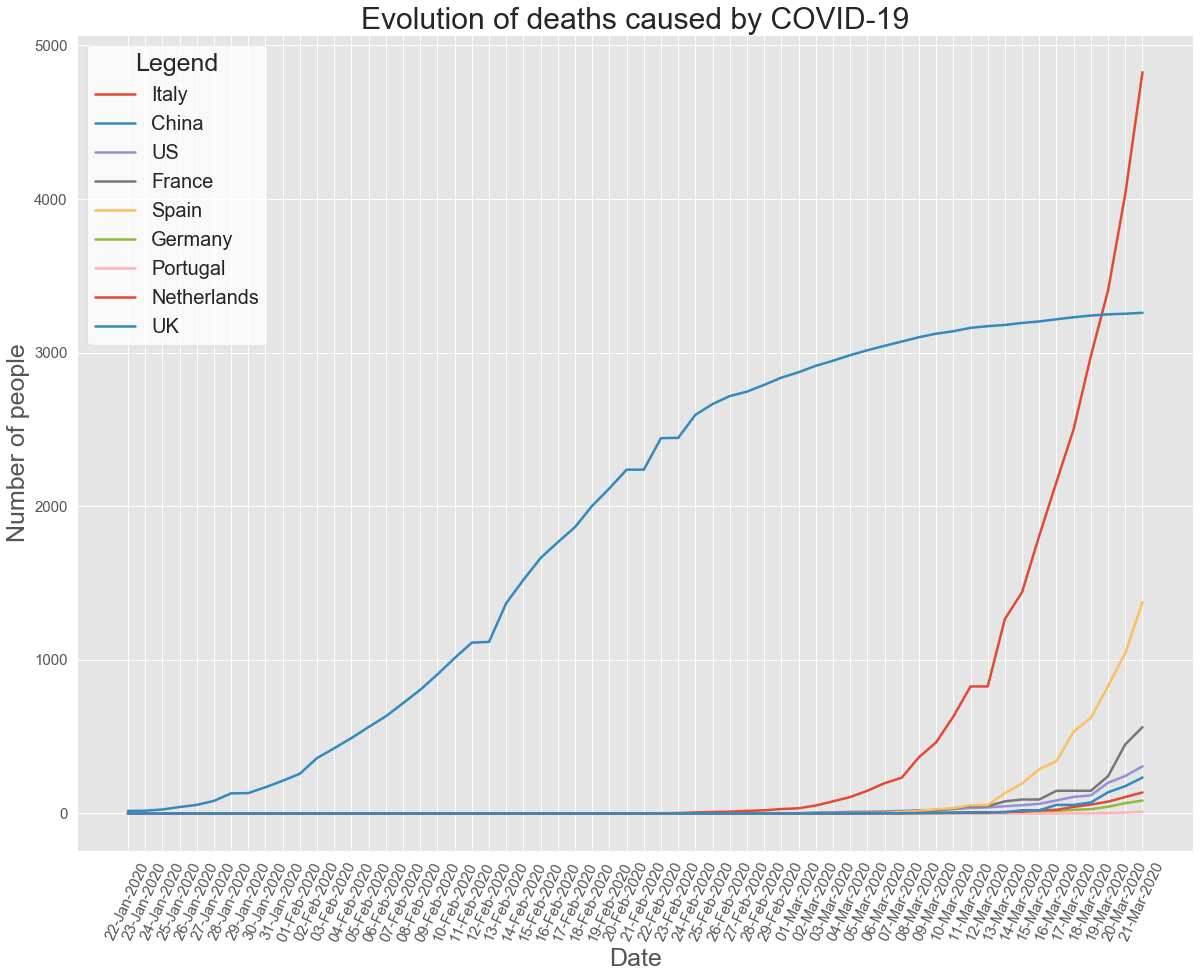

In [178]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.ylabel('Number of people', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.title('Evolution of deaths caused by COVID-19', fontsize=30)

ax.plot(deaths_t.index,deaths_t.Italy, label = 'Italy', linewidth=2.5)
ax.plot(deaths_t.index,deaths_t.China, label = 'China', linewidth=2.5)
ax.plot(deaths_t.index,deaths_t.US, label = 'US', linewidth=2.5)
ax.plot(deaths_t.index,deaths_t.France, label = 'France',linewidth=2.5)
ax.plot(deaths_t.index,deaths_t.Spain, label = 'Spain', linewidth=2.5)
ax.plot(deaths_t.index,deaths_t.Germany, label = 'Germany', linewidth=2.5)
ax.plot(deaths_t.index,deaths_t.Portugal, label = 'Portugal', linewidth=2.5)
ax.plot(deaths_t.index,deaths_t.Netherlands, label = 'Netherlands', linewidth=2.5)
ax.plot(deaths_t.index,deaths_t['United Kingdom'], label = 'UK', linewidth=2.5)

plt.style.use('ggplot')
plt.xticks(fontsize=15, rotation=65)
plt.yticks(fontsize=15)
plt.tick_params(axis='x', which='major')

ax.get_legend_handles_labels()
ax.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)


plt.savefig('deaths_covid_evolution_Europe.jpg', dpi=480)
plt.show()

# Plotting confirmed cases evolution

In [179]:
confirmed = confirmed.groupby(['Country/Region']).sum()

In [182]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [185]:
#sorting dataframe of top countries affected in descending order
confirmed = confirmed.sort_values(by=confirmed.columns[-1], ascending = False)
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374
Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213


In [186]:
#making date as index of dataframe to be used later on graphs
confirmed_t = confirmed.transpose()

In [188]:
confirmed_t.tail()

Country/Region,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom,Netherlands,Belgium,Austria,Norway,Sweden,Denmark,Portugal,Canada,Malaysia,Australia,Brazil,Japan,Czechia,Israel,Ireland,Pakistan,Cruise Ship,Turkey,Luxembourg,Chile,Poland,Greece,Finland,Ecuador,Qatar,Iceland,Indonesia,Singapore,Thailand,Saudi Arabia,Slovenia,Romania,India,Peru,Philippines,Russia,Estonia,Bahrain,Egypt,South Africa,Iraq,Croatia,Mexico,Panama,Colombia,Lebanon,Slovakia,Kuwait,Serbia,Bulgaria,Armenia,Argentina,United Arab Emirates,Taiwan*,San Marino,Algeria,Latvia,Costa Rica,Dominican Republic,Uruguay,Hungary,Morocco,Vietnam,Bosnia and Herzegovina,Andorra,Jordan,North Macedonia,Cyprus,Brunei,Lithuania,Moldova,Sri Lanka,Belarus,Albania,Malta,Venezuela,Burkina Faso,Tunisia,Kazakhstan,Cambodia,Azerbaijan,Oman,New Zealand,Georgia,Trinidad and Tobago,Senegal,Ukraine,Uzbekistan,Liechtenstein,Martinique,Cameroon,Bangladesh,Afghanistan,Honduras,Congo (Kinshasa),Nigeria,Cuba,Ghana,Bolivia,Paraguay,Rwanda,Guatemala,Jamaica,Togo,Kyrgyzstan,Cote d'Ivoire,Mauritius,Montenegro,Maldives,Monaco,Mongolia,Ethiopia,Guyana,Kenya,Seychelles,Tanzania,Barbados,Equatorial Guinea,"Bahamas, The",Gabon,Suriname,Congo (Brazzaville),Cabo Verde,El Salvador,Central African Republic,Madagascar,Liberia,Namibia,Zimbabwe,Sudan,Benin,Guinea,Kosovo,Bhutan,Haiti,Mauritania,Angola,Zambia,Nicaragua,Saint Lucia,Eswatini,Antigua and Barbuda,Nepal,Uganda,"Gambia, The",Niger,Chad,Djibouti,Cape Verde,Holy See,East Timor,Somalia,Saint Vincent and the Grenadines,Eritrea,Papua New Guinea,Fiji
3/17/20,81058,31506,6421,11748,9257,16169,7699,8320,2700,1960,1711,1243,1332,1463,1190,1025,448,478,673,452,321,878,396,337,223,236,696,47,140,201,238,387,321,58,439,220,172,266,177,171,275,184,142,117,187,114,225,228,196,62,154,65,82,69,65,120,72,130,65,67,78,68,98,77,109,60,49,41,21,29,50,38,66,26,39,34,26,46,56,25,30,44,36,55,38,33,15,24,33,33,28,24,12,34,5,26,14,10,7,16,10,10,22,8,3,3,5,7,11,9,7,6,12,1,0,5,0,2,13,7,5,5,7,3,4,1,2,1,1,1,1,1,0,0,1,0,1,2,0,1,1,1,2,1,0,1,0,0,0,2,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0
3/18/20,81102,35713,7783,13910,12327,17361,9105,8413,3028,2642,2058,1486,1646,1550,1279,1116,448,657,790,568,372,889,464,433,292,299,712,98,203,238,251,418,336,111,452,250,227,313,212,171,275,260,156,145,202,147,258,256,196,116,164,81,93,86,93,133,105,142,83,92,84,79,113,100,119,74,71,50,21,50,58,49,75,38,39,52,35,49,68,27,30,51,51,59,38,36,20,29,35,35,28,39,20,38,7,31,14,15,28,19,10,14,22,9,4,8,7,7,12,11,8,6,13,1,3,6,3,1,13,7,6,6,7,3,4,3,2,4,1,1,1,1,0,0,1,0,2,2,0,2,2,1,2,1,0,1,0,2,0,2,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0
3/19/20,81156,41035,13677,17963,15320,18407,10947,8565,4075,2716,2467,1795,2013,1746,1439,1225,785,800,900,681,621,924,694,677,557,454,712,192,335,238,355,418,400,199,460,330,311,345,272,274,286,277,194,234,217,199,267,278,256,150,192,105,118,109,102,157,123,148,103,94,115,97,140,108,119,87,86,69,34,79,73,63,85,63,53,69,48,67,75,36,49,60,51,64,53,42,33,39,44,37,44,48,28,40,9,31,16,23,28,23,13,17,22,12,14,8,11,11,12,11,8,9,15,1,3,9,3,3,13,7,6,6,7,7,6,6,5,6,3,1,1,3,0,1,1,0,2,3,0,2,2,1,2,1,0,2,0,2,1,2,1,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1
3/20/20,81250,47021,19100,20410,19848,19644,12726,8652,5294,4014,3003,2257,2388,1914,1639,1337,1020,943,1030,791,793,963,833,705,683,501,712,359,484,434,425,495,450,367,470,409,369,385,322,344,341,308,244,234,230,253,283,285,285,202,208,128,164,137,128,163,137,159,135,127,136,128,140,135,144,90,111,89,72,94,85,77,91,89,75,85,67,67,78,49,66,73,69,70,64,42,40,54,49,51,44,48,39,43,9,38,29,33,28,32,20,20,24,24,18,12,16,16,15,13,17,12,16,9,6,9,12,14,13,11,6,9,7,7,7,6,5,6,3,3,4,3,1,1,3,3,2,3,1,2,2,1,2,2,2,2,1,2,1,2,1,1,1,0,1,1,1,1,0,1,0,1,1,0,1,1
3/21/20,81305,53578,25489,25374,22213,20610,14431,8799,6575,5067,3640,2815,2814,2118,1763,1420,1280,1278,1183,1071,1021,1007,995,883,785,730,712,670,670,537,536,530,523,506,481,473,450,432,411,392,383,367,330,318,307,306,306,305,294,240,214,206,203,200,196,187,178,176,171,163,160,158,153,153,144,

In [189]:
confirmed_t.index[1]

'1/23/20'

In [190]:
#converting index str type to dateime
confirmed_t.index = pd.to_datetime(confirmed_t.index).strftime('%d-%b-%Y')

In [191]:
confirmed_t.tail(10)

Country/Region,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom,Netherlands,Belgium,Austria,Norway,Sweden,Denmark,Portugal,Canada,Malaysia,Australia,Brazil,Japan,Czechia,Israel,Ireland,Pakistan,Cruise Ship,Turkey,Luxembourg,Chile,Poland,Greece,Finland,Ecuador,Qatar,Iceland,Indonesia,Singapore,Thailand,Saudi Arabia,Slovenia,Romania,India,Peru,Philippines,Russia,Estonia,Bahrain,Egypt,South Africa,Iraq,Croatia,Mexico,Panama,Colombia,Lebanon,Slovakia,Kuwait,Serbia,Bulgaria,Armenia,Argentina,United Arab Emirates,Taiwan*,San Marino,Algeria,Latvia,Costa Rica,Dominican Republic,Uruguay,Hungary,Morocco,Vietnam,Bosnia and Herzegovina,Andorra,Jordan,North Macedonia,Cyprus,Brunei,Lithuania,Moldova,Sri Lanka,Belarus,Albania,Malta,Venezuela,Burkina Faso,Tunisia,Kazakhstan,Cambodia,Azerbaijan,Oman,New Zealand,Georgia,Trinidad and Tobago,Senegal,Ukraine,Uzbekistan,Liechtenstein,Martinique,Cameroon,Bangladesh,Afghanistan,Honduras,Congo (Kinshasa),Nigeria,Cuba,Ghana,Bolivia,Paraguay,Rwanda,Guatemala,Jamaica,Togo,Kyrgyzstan,Cote d'Ivoire,Mauritius,Montenegro,Maldives,Monaco,Mongolia,Ethiopia,Guyana,Kenya,Seychelles,Tanzania,Barbados,Equatorial Guinea,"Bahamas, The",Gabon,Suriname,Congo (Brazzaville),Cabo Verde,El Salvador,Central African Republic,Madagascar,Liberia,Namibia,Zimbabwe,Sudan,Benin,Guinea,Kosovo,Bhutan,Haiti,Mauritania,Angola,Zambia,Nicaragua,Saint Lucia,Eswatini,Antigua and Barbuda,Nepal,Uganda,"Gambia, The",Niger,Chad,Djibouti,Cape Verde,Holy See,East Timor,Somalia,Saint Vincent and the Grenadines,Eritrea,Papua New Guinea,Fiji
12-Mar-2020,80932,12462,1663,2277,2078,10075,2290,7869,652,459,503,314,302,702,599,617,59,117,149,128,52,639,94,131,43,20,696,1,19,23,49,99,59,17,262,103,34,178,70,45,89,49,73,15,52,28,16,195,67,17,71,19,12,11,9,61,16,80,19,7,4,19,85,49,69,24,10,22,5,0,13,6,39,11,1,1,7,6,11,3,3,2,12,23,6,0,2,7,0,3,11,18,5,24,0,4,1,0,1,3,2,3,7,2,1,2,3,0,2,5,0,0,2,1,0,1,0,0,8,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
13-Mar-2020,80945,17660,2179,5232,3675,11364,3678,7979,1139,802,806,559,504,996,814,804,112,193,197,200,151,701,141,161,90,28,696,5,34,43,68,190,155,17,320,134,69,200,75,86,141,89,82,28,64,45,79,189,80,24,101,32,12,27,13,77,32,80,35,23,8,31,85,50,80,26,17,23,5,0,19,7,47,13,1,1,14,14,37,6,6,6,27,33,12,0,2,16,4,5,15,19,5,25,0,10,3,0,1,3,2,3,7,2,2,2,4,0,3,6,0,0,8,1,0,1,0,0,9,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
14-Mar-2020,80977,21157,2727,6391,4585,12729,4487,8086,1359,1144,962,689,655,1090,961,836,169,198,238,250,151,773,189,193,129,31,696,5,51,61,103,228,225,28,337,156,96,212,82,103,181,123,102,38,111,59,115,210,109,38,110,38,26,36,22,93,44,104,46,41,18,34,85,53,80,37,26,26,11,4,30,17,53,18,1,1,14,26,40,8,12,10,27,38,18,2,2,18,6,7,15,19,6,30,2,10,3,0,4,9,2,3,11,2,2,2,4,3,10,6,1,1,8,1,0,1,0,0,10,2,1,1,1,1,2,0,0,0,0,1,1,0,0,0,0,0,0,2,0,1,0,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
15-Mar-2020,81003,24747,3499,7798,5795,13938,4523,8162,2200,1145,1138,886,860,1221,1022,875,245,252,428,297,162,839,253,251,129,53,696,6,59,74,119,331,244,28,401,171,117,226,114,103,219,131,113,43,140,63,171,214,110,51,116,49,41,43,34,110,54,112,48,51,26,45,98,59,101,48,30,27,11,4,32,28,56,24,1,8,14,26,50,12,23,18,27,42,21,10,3,18,9,7,23,22,8,33,2,24,3,1,4,9,2,5,16,3,2,2,4,6,10,6,1,1,10,1,0,1,0,0,13,2,1,1,4,3,2,0,0,1,0,1,1,1,0,0,1,0,0,2,0,1,0,1,2,1,0,1,0,0,0,2,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0
16-Mar-2020,81033,27980,4632,9942,7272,14991,6668,8236,2200,1551,1416,1058,1018,1333,1103,933,331,415,566,377,200,825,298,255,169,136,696,18,77,155,177,331,277,37,439,180,134,243,147,118,253,158,119,86,142,90,205,214,150,62,124,57,53,55,54,99,63,123,55,52,52,56,98,67,109,54,34,35,11,8,39,29,61,25,2,17,18,33,54,17,23,28,36,51,30,17,15,20,10,7,15,22,8,33,4,24,7,6,4,15,4,8,21,6,2,2,4,6,11,8,5,2,10,1,0,1,0,0,13,7,1,5,4,3,3,1,0,1,1,1,1,1,0,0,1,0,1,2,0,1,1,1,2,1,0,1,0,0,0,2,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0
17-Ma

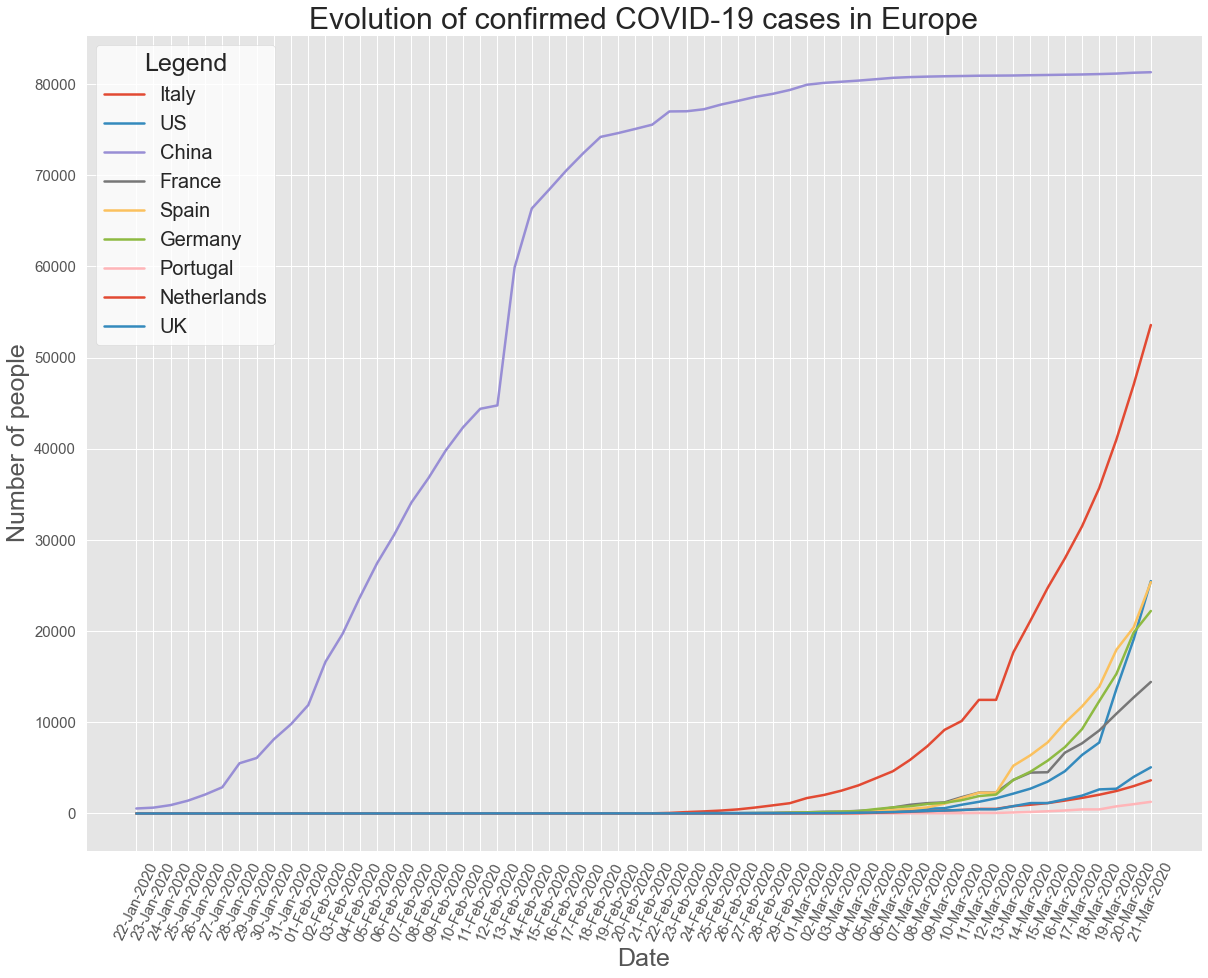

In [193]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.ylabel('Number of people', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.title('Evolution of confirmed COVID-19 cases in Europe', fontsize=30)

ax.plot(confirmed_t.index,confirmed_t.Italy, label = 'Italy', linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t.US, label = 'US', linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t.China, label = 'China', linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t.France, label = 'France',linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t.Spain, label = 'Spain', linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t.Germany, label = 'Germany', linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t.Portugal, label = 'Portugal', linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t.Netherlands, label = 'Netherlands', linewidth=2.5)
ax.plot(confirmed_t.index,confirmed_t['United Kingdom'], label = 'UK', linewidth=2.5)

plt.style.use('ggplot')
plt.xticks(fontsize=15, rotation=65)
plt.yticks(fontsize=15)
plt.tick_params(axis='x', which='major')

ax.get_legend_handles_labels()
ax.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('confirmed_covid_evolution.jpg', dpi=540)
plt.show()

# GeoPandas visualisation 

In [201]:
#ignoring CPU running errors
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

In [194]:
#importing world map template
world_map = gpd.read_file('./Countries_WGS84/Countries_WGS84.shp')

In [195]:
# designate coordinate system
crs = {'init' :'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(ds['Longitude'], ds['Latitude'])]

# create GeoPandas dataframe
geo_ds = gpd.GeoDataFrame(ds, crs = crs, geometry = geometry)

/Applications/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [196]:
geo_ds

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707,POINT (112.27070 30.97560)
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674,POINT (12.56740 41.87190)
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492,POINT (-3.74920 40.46370)
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515,POINT (10.45150 51.16570)
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880,POINT (53.68800 32.42790)
5,France,France,2020-03-21T20:43:02,14282,562,12,46.2276,2.2137,POINT (2.21370 46.22760)
6,New York,US,2020-03-21T22:43:04,11710,60,0,42.1657,-74.9481,POINT (-74.94810 42.16570)
7,NaN,"Korea, South",2020-03-21T11:13:12,8799,102,1540,35.9078,127.7669,POINT (127.76690 35.90780)
8,NaN,Switzerland,2020-03-21T20:43:02,6575,75,15,46.8182,8.2275,POINT (8.22750 46.81820)
9,United Kingdom,United Kingdom,2020-03-21T20:43:03,5018,233,65,55.3781,-3.4360,POINT (-3.43600 55.37810)


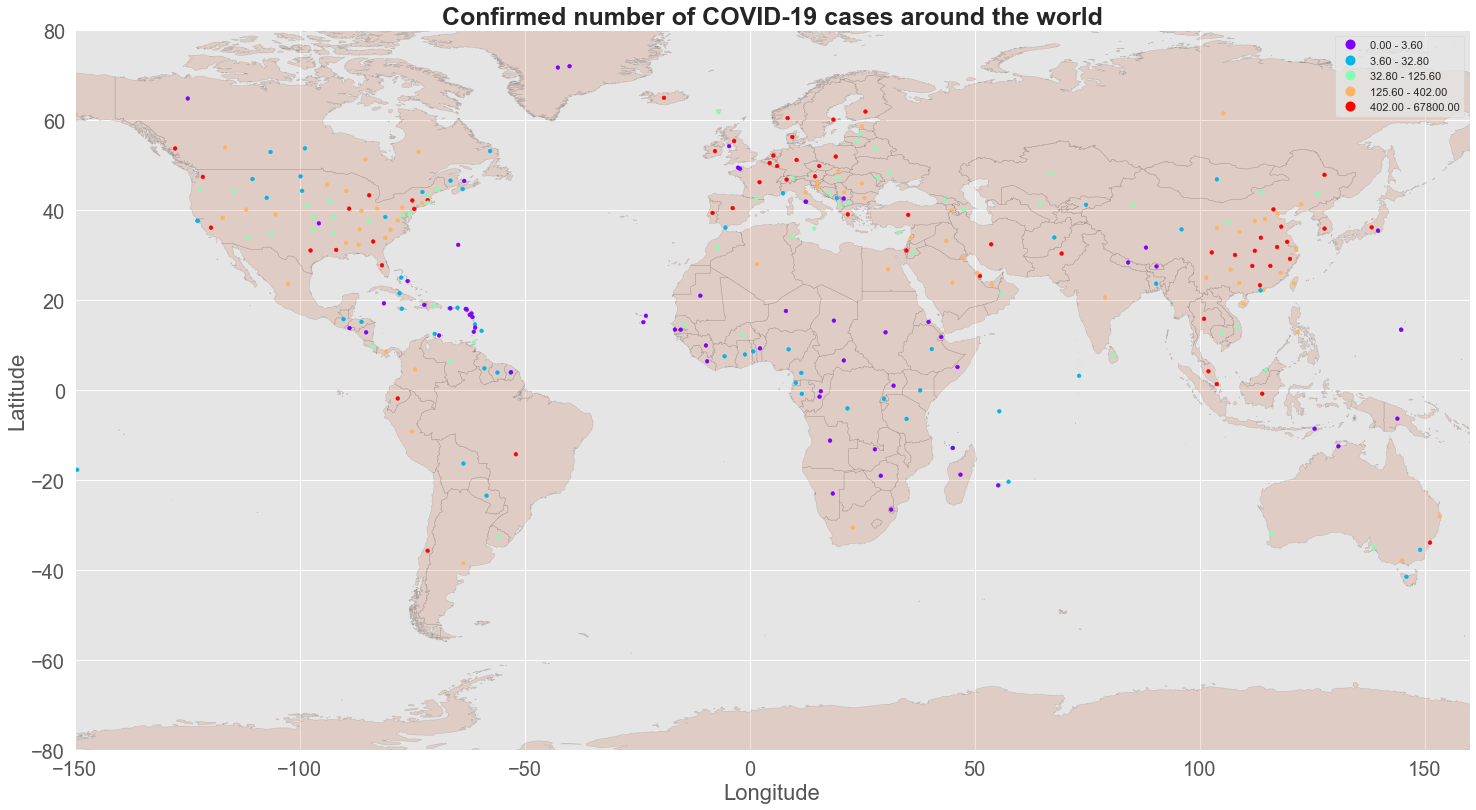

In [209]:
fig, ax = plt.subplots(figsize=(25,20))

world_map.plot(ax=ax, alpha=0.15, color='#C24813', edgecolor='black')

geo_ds.plot(column='Confirmed', ax=ax, markersize=14, 
            legend=True, 
            categorical=False, 
            scheme='Quantiles',
            cmap='rainbow')

plt.xlim(-150,160)
plt.ylim(-80,80)
plt.title('Confirmed number of COVID-19 cases around the world', fontsize=25, fontweight='bold')
plt.ylabel('Latitude', fontsize=22)
plt.xlabel('Longitude', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('covid_global_map_confirmed.jpg', dpi=540)
plt.show()

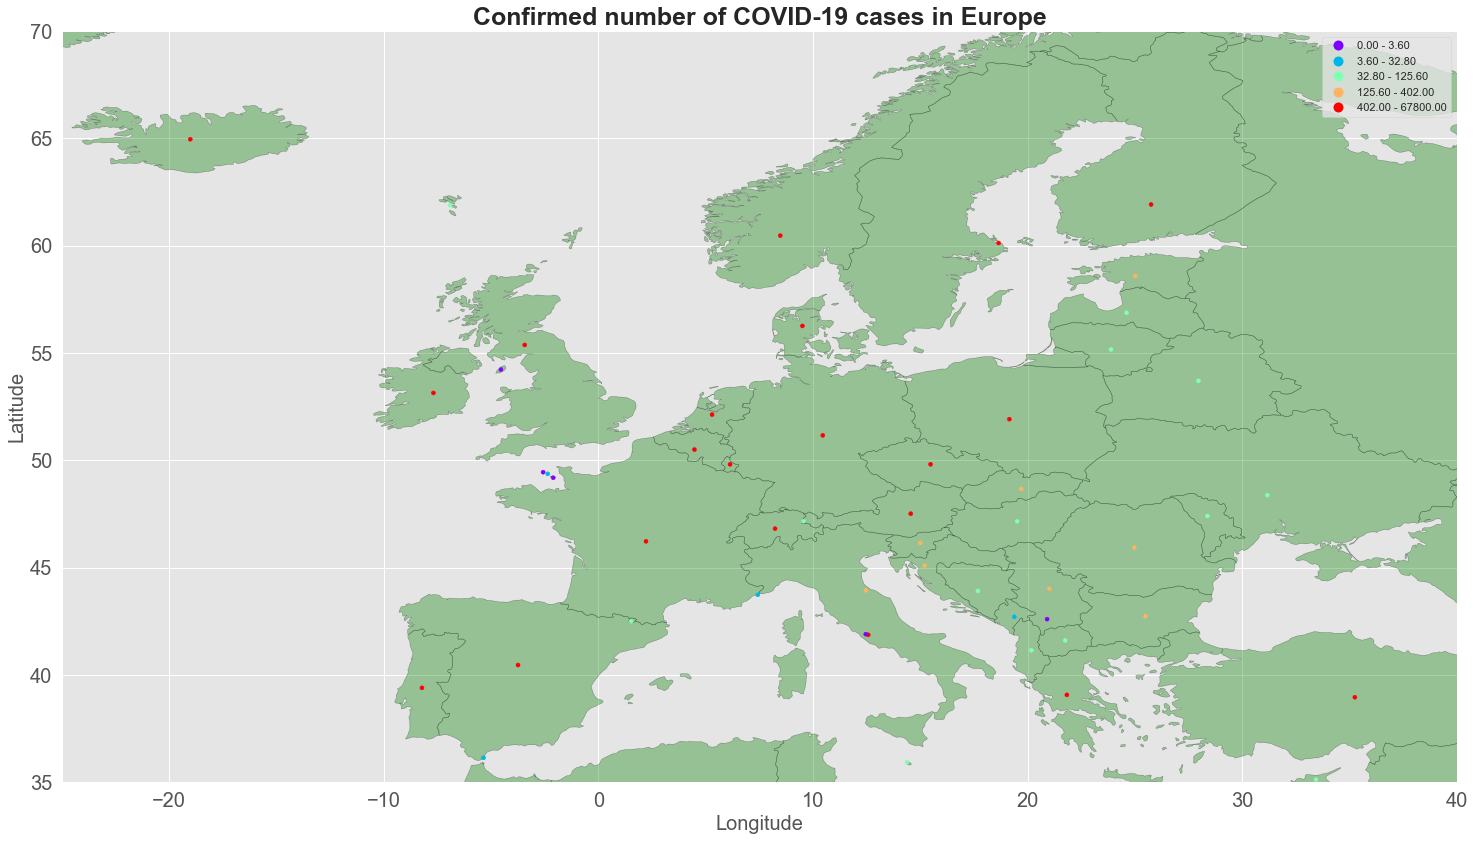

In [213]:
#plotting confirmed cases in Europe

fig, ax = plt.subplots(figsize=(25,20))

world_map.plot(ax=ax, alpha=0.35, color='green', edgecolor='black')

geo_ds.plot(column='Confirmed', ax=ax, markersize=16, 
            legend=True, 
            categorical=False, 
            scheme='Quantiles',
            cmap='rainbow')

plt.xlim(-25,40)
plt.ylim(35,70)
plt.title('Confirmed number of COVID-19 cases in Europe', fontsize=25, fontweight='bold')
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.savefig('covid_europe_map_confirmed.jpg', dpi=540)
plt.show()